In [217]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
%matplotlib inline



#### Generate X, Y , Z

In [218]:
x = np.linspace(-5,5)
y = np.linspace(-5,5)
X,Y = np.meshgrid(x,y)

def f(x,y):
    #return np.sin(x + y)
    return (x+2*y)**2
    
Z = f(X,Y)

# Add random noise into the Z values
#random_gaussians1 = np.array([[np.random.normal()for i in range(50)] for i in range(50)])
#Z = Z + random_gaussians1


#### Plot X,Y,Z ####

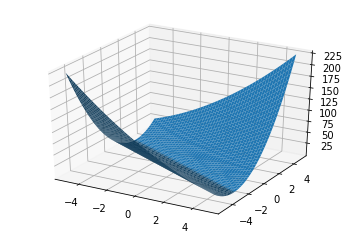

In [219]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)

In [200]:
a,b,c = X.view(),Y.view(),Z.view()
a,b,c = a.ravel(),b.ravel(),c.ravel()

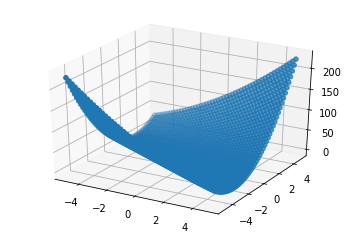

In [201]:
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(a,b,c)

In [202]:
test = np.stack((a,b,c)).T

In [203]:
test.shape

(2500, 3)

In [204]:
pca = PCA(n_components=2)
pca.fit(test)
X_pca = pca.transform(test)
print("original shape:   ", test.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2500, 3)
transformed shape: (2500, 2)


In [205]:
print(pca.components_)
print(pca.explained_variance_)


[[ 0.00000000e+00  7.95518886e-17  1.00000000e+00]
 [-0.00000000e+00 -1.00000000e+00  1.11015526e-16]]
[2226.44285553    8.67694016]


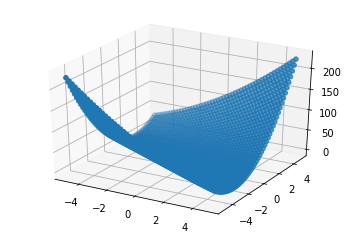

In [206]:
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(test[:, 0], test[:, 1], test[:,2])

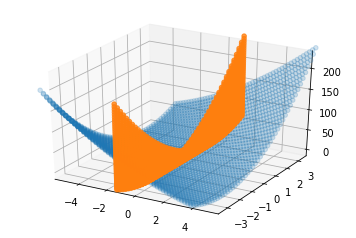

In [215]:
fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')
X_new = pca.inverse_transform(X_pca)
ax3.scatter(test[:, 0], test[:, 1], test[:,2],alpha=0.2)
ax3.scatter(X_new[:, 0], X_new[:, 1], X_new[:,2],alpha=0.8)
ax3.axis('equal');

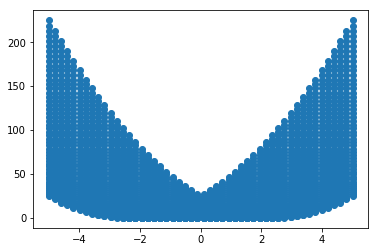

In [216]:
plt.scatter(X_new[:,1],X_new[:,2])

(50,) (50,)


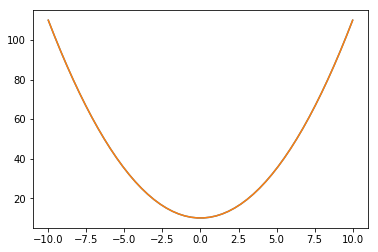

In [208]:
x = np.linspace(-10,10)

def g(x):
    return x**2+10

y = g(x)
plt.plot(x,y)

print(x.shape,y.shape)

combined = np.stack((x,y)).T
combined.shape
plt.plot(combined[:,0],combined[:,1])

In [172]:
pca = PCA(n_components=1)
pca.fit(combined)
X_pca = pca.transform(combined)
print("original shape:   ", combined.shape)
print("transformed shape:", X_pca.shape)

original shape:    (50, 2)
transformed shape: (50, 1)


[1.42108547e-16 4.46938776e+01] [ 0.         18.79642299]
[[0. 1.]]
[981.40421499]


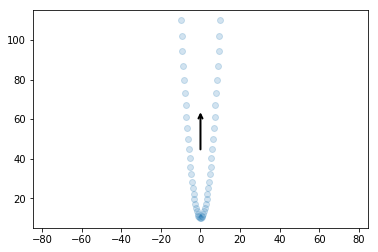

In [173]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(combined[:, 0], combined[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    v = v/5
    draw_vector(pca.mean_, pca.mean_ + v)
    print(pca.mean_,v)
plt.axis('equal');

print(pca.components_)
print(pca.explained_variance_)